In [1]:
%matplotlib inline
from fastai.basics import *

# number of data points we have (x, y) pairs
n = 100

x = torch.FloatTensor(n, 1).uniform_(-1., 1)
x[:5]

tensor([[-0.7013],
        [-0.4913],
        [ 0.7466],
        [-0.6312],
        [ 0.4204]])

In [2]:
# we're trying to find parameters for the equation: y = a1x + a2
# we therefore need to append a column of ones to x
x = torch.cat((x, torch.ones(n, 1)), dim=1)

In [3]:
x[:5]

tensor([[-0.7013,  1.0000],
        [-0.4913,  1.0000],
        [ 0.7466,  1.0000],
        [-0.6312,  1.0000],
        [ 0.4204,  1.0000]])

In [4]:
# okay, now let's set a1 and a2. What SGD finally computes will be similar to these values hopefully

a = tensor(3., 2); a

tensor([3., 2.])

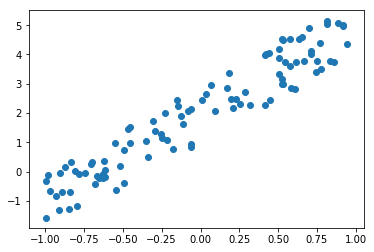

In [5]:
# introduce some fake randomness in our training data. plot.

y = x@a + ((torch.rand(n) * 2) - 1)
plt.scatter(x[:, 0], y);

In [6]:
# our loss function (the one we want to minimize)
mse = lambda y_hat, y: ((y_hat - y) ** 2).mean()

In [7]:
# let's "predict" that our parameters are (-1.0, 1.0). what is the error?
b = tensor(-1., 1)
mse(x@b, y)

tensor(6.8408)

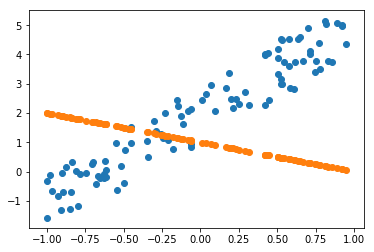

In [8]:
# let's also plot the predicted line, just for funsies
plt.scatter(x[:, 0], y)
plt.scatter(x[:, 0], x@b);

In [9]:
# SGD works like the following. Remember our objective is to minimize the loss.
# theta_i = theta_i - lr * (d/dtheta_i(loss_func)) [d is partial derivative]
# keep repeating that

c = nn.Parameter(tensor(-1., 1))  # why am I doing this?
lr = 1e-1  # learning rate, no idea why it's set to this value, though

def update():
    y_hat = x@c
    loss = mse(y_hat, y)
    
    loss.backward()  # what does this mean?
    
    with torch.no_grad():  # what does this mean, lol
        c.sub_(lr * c.grad)  # subtract (in place) the gradient weighted by learning rate
        c.grad.zero_()  # zero out the grad because everything in this code is in-place mutation
        
    return loss

tensor(6.8408, grad_fn=<MeanBackward0>)
tensor(1.5891, grad_fn=<MeanBackward0>)
tensor(0.6000, grad_fn=<MeanBackward0>)
tensor(0.3828, grad_fn=<MeanBackward0>)
tensor(0.3347, grad_fn=<MeanBackward0>)
tensor(0.3240, grad_fn=<MeanBackward0>)
tensor(0.3217, grad_fn=<MeanBackward0>)
tensor(0.3211, grad_fn=<MeanBackward0>)
tensor(0.3210, grad_fn=<MeanBackward0>)
tensor(0.3210, grad_fn=<MeanBackward0>)


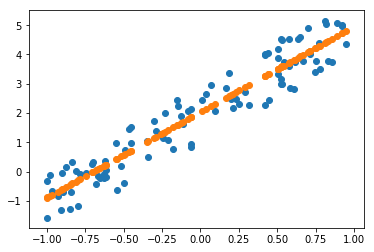

In [10]:
for t in range(100):  # 100 epochs? is that the word?
    loss = update()
    if not t % 10:
        print(loss)
        
plt.scatter(x[:, 0], y)
plt.scatter(x[:, 0], x@c);

In [11]:
# and what were the weights it found?
c

Parameter containing:
tensor([2.9253, 2.0319], requires_grad=True)

In [12]:
torch.no_grad?

Init signature: torch.no_grad()
Docstring:     
Context-manager that disabled gradient calculation.

Disabling gradient calculation is useful for inference, when you are sure
that you will not call :meth:`Tensor.backward()`. It will reduce memory
consumption for computations that would otherwise have `requires_grad=True`.

In this mode, the result of every computation will have
`requires_grad=False`, even when the inputs have `requires_grad=True`.

This mode has no effect when using :class:`~enable_grad` context manager .

This context manager is thread local; it will not affect computation
in other threads.

Also functions as a decorator.


Example::

    >>> x = torch.tensor([1], requires_grad=True)
    >>> with torch.no_grad():
    ...   y = x * 2
    >>> y.requires_grad
    False
    >>> @torch.no_grad()
    ... def doubler(x):
    ...     return x * 2
    >>> z = doubler(x)
    >>> z.requires_grad
    False
File:           ~/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/t

In [13]:
nn.Parameter.backward?

Signature: nn.Parameter.backward(self, gradient=None, retain_graph=None, create_graph=False)
Docstring:
Computes the gradient of current tensor w.r.t. graph leaves.

The graph is differentiated using the chain rule. If the tensor is
non-scalar (i.e. its data has more than one element) and requires
gradient, the function additionally requires specifying ``gradient``.
It should be a tensor of matching type and location, that contains
the gradient of the differentiated function w.r.t. ``self``.

This function accumulates gradients in the leaves - you might need to
zero them before calling it.

Arguments:
    gradient (Tensor or None): Gradient w.r.t. the
        tensor. If it is a tensor, it will be automatically converted
        to a Tensor that does not require grad unless ``create_graph`` is True.
        None values can be specified for scalar Tensors or ones that
        don't require grad. If a None value would be acceptable then
        this argument is optional.
    retain_graph 